In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
linear = LinearRegression()

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
file = './hmd(1).xlsx'

In [6]:
df = pd.read_excel(file)

In [7]:
df.columns

Index(['证券代码'', 'id', '会计期间'', 'year', '行业', 'code', '合计发明专利申请量', '总申请量',
       '合计发明专利授权量', '各年被引用次数_y', 'group', 'eig', 'OutDegree', 'InDegree',
       'pjdegree', 'groups', 'OutDegrees', 'InDegrees', 'e', 'pjdegrees',
       'ROA', 'size(企业规模）', '资本密集度', 'OCF（经营活动现金流比率）', 'lev（资产负债率）',
       'TOP1(第一大股东持股占比)', '独董占比', 'TobinQ(市值A)', 'HHI', 'age1公司成立日期年龄',
       'age2上市日期年龄', 'rd'],
      dtype='object')

## 选择目标列，输入的列名和输出的列名

In [8]:
aim_columns = ['合计发明专利申请量', 'group', 'ROA', 'size(企业规模）', '资本密集度', 'OCF（经营活动现金流比率）', 'lev（资产负债率）',
       'TOP1(第一大股东持股占比)', '独董占比', 'TobinQ(市值A)', 'HHI', 'age1公司成立日期年龄']

In [9]:
aim_df = df[aim_columns]

In [10]:
aim_df.shape

(28251, 12)

In [11]:
aim_df.head()

,合计发明专利申请量,group,ROA,size(企业规模）,资本密集度,OCF（经营活动现金流比率）,lev（资产负债率）,TOP1(第一大股东持股占比),独董占比,TobinQ(市值A),HHI,age1公司成立日期年龄
0,NaN,1,0.058750,10.191295,0.014898,0.067501,0.594163,0.1289,0.363636,1.297813,0.021229,20
1,NaN,1,0.065178,10.342272,0.009854,0.038351,0.609809,0.1181,0.363636,1.315271,0.026017,21
2,NaN,1,0.047589,10.685813,0.010452,-0.062343,0.649418,0.1454,0.363636,1.900205,0.034094,22
3,NaN,1,0.053125,11.000410,0.005747,-0.104279,0.661125,0.1463,0.363636,2.520221,0.050203,23
4,NaN,1,0.038913,11.076410,0.010612,-0.000286,0.674441,0.1473,0.363636,1.249145,0.055167,24


In [12]:
aim_df.dropna(inplace=True)

d:\python3.78\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
aim_df.head()

,合计发明专利申请量,group,ROA,size(企业规模）,资本密集度,OCF（经营活动现金流比率）,lev（资产负债率）,TOP1(第一大股东持股占比),独董占比,TobinQ(市值A),HHI,age1公司成立日期年龄
15,0.0,0,-0.015321,8.330962,0.180441,0.001892,0.427696,0.3794,0.333333,2.040061,0.031119,18
16,0.0,0,-0.119186,8.192759,0.208786,0.070962,0.358844,0.3794,0.333333,1.788395,0.031789,19
17,0.0,0,0.014954,8.310278,0.165953,-0.043921,0.450415,0.2844,0.333333,1.703456,0.031721,20
18,2.0,0,-0.058897,8.229995,0.179077,-0.040938,0.424184,0.2596,0.375000,4.383727,0.030350,21
19,2.0,0,-0.068435,8.224819,0.171930,0.008511,0.491793,0.2608,0.333333,2.066046,0.024949,22


In [14]:
aim_df.shape

(23447, 12)

In [15]:
y_raw = aim_df.pop('合计发明专利申请量')

In [16]:
aim_df.shape

(23447, 11)

In [17]:
y = np.log(y_raw + 1)

In [18]:
y.head(20)

15    0.000000
16    0.000000
17    0.000000
18    1.098612
19    1.098612
20    0.693147
21    0.693147
22    0.000000
23    0.000000
24    0.000000
25    2.564949
26    0.693147
27    0.000000
28    0.693147
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    0.000000
Name: 合计发明专利申请量, dtype: float64

In [19]:
y.describe()

count    23447.000000
mean         1.453899
std          1.555694
min          0.000000
25%          0.000000
50%          1.098612
75%          2.484907
max          9.312536
Name: 合计发明专利申请量, dtype: float64

In [20]:
y_raw.describe()

count    23447.000000
mean        25.603318
std        205.606124
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max      11075.000000
Name: 合计发明专利申请量, dtype: float64

In [21]:
X = aim_df

In [22]:
X

,group,ROA,size(企业规模）,资本密集度,OCF（经营活动现金流比率）,lev（资产负债率）,TOP1(第一大股东持股占比),独董占比,TobinQ(市值A),HHI,age1公司成立日期年龄
15,0,-0.015321,8.330962,0.180441,0.001892,0.427696,0.3794,0.333333,2.040061,0.031119,18
16,0,-0.119186,8.192759,0.208786,0.070962,0.358844,0.3794,0.333333,1.788395,0.031789,19
17,0,0.014954,8.310278,0.165953,-0.043921,0.450415,0.2844,0.333333,1.703456,0.031721,20
18,0,-0.058897,8.229995,0.179077,-0.040938,0.424184,0.2596,0.375000,4.383727,0.030350,21
19,0,-0.068435,8.224819,0.171930,0.008511,0.491793,0.2608,0.333333,2.066046,0.024949,22
...,...,...,...,...,...,...,...,...,...,...,...
28242,0,0.092494,8.967747,0.158316,0.101421,0.093152,0.3669,0.333333,1.808544,0.019103,14
28243,0,0.090853,9.028032,0.219650,0.084913,0.126508,0.3669,0.333333,4.739523,0.018101,15
28244,0,0.057777,9.104146,0.210559,0.093391,0.229196,0.3631,0.375000,4.252455,0.016433,16
28245,0,0.047069,9.137653,0.269435,0.011656,0.244282,0.3641,0.428571,3.719860,0.015011,17


In [23]:
linear.fit(X, y)

LinearRegression()

In [24]:
linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [25]:
linear.coef_

array([ 0.08235565, -0.00991966,  1.31983938, -1.62873581,  0.51955308,
       -0.02450001, -0.84424563,  1.330816  ,  0.04294071, -1.4604309 ,
       -0.00271611])

In [26]:
linear.intercept_

-10.82907074639992

In [27]:
X.columns

Index(['group', 'ROA', 'size(企业规模）', '资本密集度', 'OCF（经营活动现金流比率）', 'lev（资产负债率）',
       'TOP1(第一大股东持股占比)', '独董占比', 'TobinQ(市值A)', 'HHI', 'age1公司成立日期年龄'],
      dtype='object')

In [28]:
X.shape

(23447, 11)

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [30]:
ols_X = sm.add_constant(X)
model = sm.OLS(y, ols_X).fit()
summury1 = model.summary()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              合计发明专利申请量   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     747.4
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:22:14   Log-Likelihood:                -40106.
No. Observations:               23447   AIC:                         8.024e+04
Df Residuals:                   23435   BIC:                         8.033e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.8291      0.166    -65.221      0.000     -11.155     -10.504
group               0.0824      0.020      4.100      0.000       0.043       0.122
ROA                -0.0099      0.017     -0.578      0.563      -0.044       0.024
size(企业规模）          1.3198      0.017     75.670      0.000       1.286       1.354
资本密集度              -1.6287      0.052    -31.154      0.000      -1.731      -1.526
OCF（经营活动现金流比率）      0.5196      0.107      4.838      0.000       0.309       0.730
lev（资产负债率）         -0.0245      0.009     -2.656      0.008      -0.043      -0.006
TOP1(第一大股东持股占比)    -0.8442      0.061    -13.808      0.000      -0.964      -0.724
独董占比                1.3308      0.162      8.222      0.000       1.014       1.648
TobinQ(市值A)         0.0429      0.004     10.039      0.000       0.035       0.051
HHI                -1.4604      0.077    -18.846      0.000      -1.612      -1.309
age1公司成立日期年龄       -0.0027      0.002     -1.686      0.092      -0.006       0.000
==============================================================================
Omnibus:                      472.941   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.304
Skew:                           0.333   Prob(JB):                    1.86e-105
Kurtosis:                       2.779   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [32]:
X.head()

,group,ROA,size(企业规模）,资本密集度,OCF（经营活动现金流比率）,lev（资产负债率）,TOP1(第一大股东持股占比),独董占比,TobinQ(市值A),HHI,age1公司成立日期年龄
15,0,-0.015321,8.330962,0.180441,0.001892,0.427696,0.3794,0.333333,2.040061,0.031119,18
16,0,-0.119186,8.192759,0.208786,0.070962,0.358844,0.3794,0.333333,1.788395,0.031789,19
17,0,0.014954,8.310278,0.165953,-0.043921,0.450415,0.2844,0.333333,1.703456,0.031721,20
18,0,-0.058897,8.229995,0.179077,-0.040938,0.424184,0.2596,0.375000,4.383727,0.030350,21
19,0,-0.068435,8.224819,0.171930,0.008511,0.491793,0.2608,0.333333,2.066046,0.024949,22


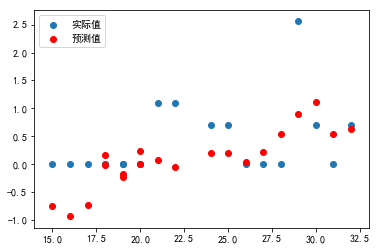

In [33]:
predicts = model.predict(ols_X) # 模型的预测值
plt.scatter(X['age1公司成立日期年龄'][:20], y[:20], label='实际值') # 散点图
plt.scatter(X['age1公司成立日期年龄'][:20], predicts[:20], color = 'red', label='预测值')
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形

In [34]:
predicts

15      -0.020211
16      -0.224680
17       0.010866
18       0.077222
19      -0.044654
           ...   
28242    0.944141
28243    1.039040
28244    1.193985
28245    1.146525
28246    1.233570
Length: 23447, dtype: float64

In [35]:
y

15       0.000000
16       0.000000
17       0.000000
18       1.098612
19       1.098612
           ...   
28242    1.098612
28243    1.386294
28244    1.386294
28245    1.609438
28246    1.098612
Name: 合计发明专利申请量, Length: 23447, dtype: float64

In [36]:
errors = (predicts - y) ** 2

In [37]:
errors

15       0.000408
16       0.050481
17       0.000118
18       1.043239
19       1.307059
           ...   
28242    0.023861
28243    0.120586
28244    0.036983
28245    0.214289
28246    0.018213
Length: 23447, dtype: float64

In [38]:
errors.describe()

count    2.344700e+04
mean     1.791564e+00
std      2.389573e+00
min      1.371090e-08
25%      2.522798e-01
50%      9.538773e-01
75%      2.416597e+00
max      3.249794e+01
dtype: float64

In [39]:
errors.shape

(23447,)

- 排序

In [59]:
errors

15       0.000408
16       0.050481
17       0.000118
18       1.043239
19       1.307059
           ...   
28242    0.023861
28243    0.120586
28244    0.036983
28245    0.214289
28246    0.018213
Length: 23447, dtype: float64

In [43]:
err_sort = errors.sort_values()

In [44]:
len(err_sort)

23447

In [48]:
ration = int(len(err_sort) * 0.8)

In [49]:
ration

18757

In [53]:
select_err_sort = err_sort[:ration]
select_err_sort

11287    1.371090e-08
20547    2.317511e-08
2383     3.212403e-08
14854    4.682409e-08
7805     7.810382e-08
             ...     
8381     2.929105e+00
9562     2.929614e+00
6389     2.930964e+00
24886    2.932225e+00
1765     2.932572e+00
Length: 18757, dtype: float64

In [55]:
select_err_sort.sort_index()

15       0.000408
16       0.050481
17       0.000118
18       1.043239
19       1.307059
           ...   
28242    0.023861
28243    0.120586
28244    0.036983
28245    0.214289
28246    0.018213
Length: 18757, dtype: float64

In [57]:
select_err = err_sort[:ration].sort_index()

In [58]:
select_err

15       0.000408
16       0.050481
17       0.000118
18       1.043239
19       1.307059
           ...   
28242    0.023861
28243    0.120586
28244    0.036983
28245    0.214289
28246    0.018213
Length: 18757, dtype: float64

丢弃>75%数量的数据（距离太远的）

In [176]:
del_75 = errors[errors<errors.describe()['75%']].index

In [178]:
errors[errors<errors.describe()['75%']].index

Int64Index([   15,    16,    17,    18,    19,    20,    21,    22,    23,
               24,
            ...
            28231, 28234, 28235, 28236, 28237, 28242, 28243, 28244, 28245,
            28246],
           dtype='int64', length=17585)

In [130]:
del_75

Int64Index([   25,    82,    83,    85,    89,   120,   122,   123,   124,
              125,
            ...
            27943, 27944, 27945, 27946, 27947, 27991, 27993, 27994, 28232,
            28233],
           dtype='int64', length=5862)

In [123]:
errors[errors>errors.describe()['75%']]

25       2.773307
82       6.281172
83       7.045956
85       4.113355
89       5.057373
           ...   
27991    3.678657
27993    2.791019
27994    2.969843
28232    3.129575
28233    4.192899
Length: 5862, dtype: float64

In [124]:
errors[errors>errors.describe()['50%']]

18       1.043239
19       1.307059
25       2.773307
81       1.293924
82       6.281172
           ...   
27993    2.791019
27994    2.969843
28232    3.129575
28233    4.192899
28237    1.485282
Length: 11723, dtype: float64

In [125]:
errors[errors>errors.describe()['25%']]

18       1.043239
19       1.307059
24       0.283149
25       2.773307
27       0.286496
           ...   
28233    4.192899
28234    0.469549
28235    0.344374
28236    0.619427
28237    1.485282
Length: 17585, dtype: float64

- 开始删距离预测值最远的25%数量的数据

In [128]:
df.shape, aim_df.shape

((28251, 32), (23447, 11))

- 查看要删除的原始数据

In [162]:
df.loc[del_75, :].head()

,证券代码',id,会计期间',year,行业,code,合计发明专利申请量,总申请量,合计发明专利授权量,各年被引用次数_y,...,资本密集度,OCF（经营活动现金流比率）,lev（资产负债率）,TOP1(第一大股东持股占比),独董占比,TobinQ(市值A),HHI,age1公司成立日期年龄,age2上市日期年龄,rd
25,4,4,2015-12-31,2015,医药制造业,1,12.0,12.0,8.0,2.0,...,0.094771,0.023232,0.590402,0.2842,0.333333,10.146903,0.018101,29,24,NaN
82,8,8,2016-12-31,2016,交通运输设备制造业,23,0.0,4.0,0.0,NaN,...,0.022316,-0.006851,0.246583,0.1246,0.428571,2.299946,0.132032,27,24,0.016694
83,8,8,2017-12-31,2017,交通运输设备制造业,23,0.0,4.0,0.0,NaN,...,0.022952,-0.004959,0.326949,0.1242,0.428571,2.166560,0.127497,28,25,0.019248
85,9,9,2004-12-31,2004,综合类,64,0.0,3.0,0.0,NaN,...,0.173856,0.029304,0.663205,0.1164,0.375000,1.196466,0.104491,14,13,NaN
89,9,9,2008-12-31,2008,综合类,64,0.0,0.0,0.0,220.0,...,0.147308,0.068724,0.589999,0.0834,0.375000,1.193601,0.088915,18,17,NaN


- 查看要要删除的，【选了列】，【去了空值】的数据

In [163]:
aim_df.loc[del_75[:10], :]

,group,ROA,size(企业规模）,资本密集度,OCF（经营活动现金流比率）,lev（资产负债率）,TOP1(第一大股东持股占比),独董占比,TobinQ(市值A),HHI,age1公司成立日期年龄
25,0,0.017200,8.600617,0.094771,0.023232,0.590402,0.2842,0.333333,10.146903,0.018101,29
82,0,0.064758,9.913425,0.022316,-0.006851,0.246583,0.1246,0.428571,2.299946,0.132032,27
83,0,0.083310,10.028503,0.022952,-0.004959,0.326949,0.1242,0.428571,2.166560,0.127497,28
85,1,0.011016,9.696346,0.173856,0.029304,0.663205,0.1164,0.375000,1.196466,0.104491,14
89,1,0.044634,9.784174,0.147308,0.068724,0.589999,0.0834,0.375000,1.193601,0.088915,18
120,1,0.083806,10.037958,0.738070,0.153045,0.485852,0.0654,0.333333,1.912127,0.085478,25
122,1,0.087526,10.184163,0.617201,0.110496,0.521906,0.0362,0.333333,1.502386,0.085162,27
123,1,0.025796,10.156422,0.656986,0.120384,0.493004,0.0362,0.333333,1.474481,0.083597,28
124,1,0.107516,10.178369,0.529213,0.112665,0.442868,0.0362,0.333333,1.396454,0.084492,29
125,1,0.055877,10.184248,0.644522,0.092006,0.442985,0.0362,0.333333,1.428544,0.079582,30


In [179]:
aim_df_75 = aim_df.loc[del_75, :]

In [185]:
y_raw_75 = y_raw.loc[del_75]

In [187]:
aim_df_75.shape, y_raw_75.shape

((17585, 11), (17585,))

In [191]:
y_75 = np.log(y_raw_75 + 1)
X_75 = aim_df_75
ols_X_75 = sm.add_constant(X_75)
model = sm.OLS(y_75, ols_X_75).fit()
summury75 = model.summary()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              合计发明专利申请量   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1544.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:50:57   Log-Likelihood:                -22126.
No. Observations:               17585   AIC:                         4.428e+04
Df Residuals:                   17573   BIC:                         4.437e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.1383      0.130    -93.710      0.000     -12.392     -11.884
group               0.0956      0.015      6.378      0.000       0.066       0.125
ROA                -0.0231      0.012     -1.870      0.062      -0.047       0.001
size(企业规模）          1.4569      0.014    105.730      0.000       1.430       1.484
资本密集度              -1.9179      0.038    -50.049      0.000      -1.993      -1.843
OCF（经营活动现金流比率）      0.5053      0.082      6.165      0.000       0.345       0.666
lev（资产负债率）         -0.0374      0.012     -3.208      0.001      -0.060      -0.015
TOP1(第一大股东持股占比)    -1.1585      0.046    -25.364      0.000      -1.248      -1.069
独董占比                1.5278      0.121     12.622      0.000       1.291       1.765
TobinQ(市值A)         0.0477      0.004     13.078      0.000       0.041       0.055
HHI                -1.5249      0.056    -27.253      0.000      -1.635      -1.415
age1公司成立日期年龄       -0.0006      0.001     -0.510      0.610      -0.003       0.002
==============================================================================
Omnibus:                     5314.170   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.401
Skew:                           0.148   Prob(JB):                    2.69e-189
Kurtosis:                       1.952   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
summury1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              合计发明专利申请量   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     747.4
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:50:41   Log-Likelihood:                -40106.
No. Observations:               23447   AIC:                         8.024e+04
Df Residuals:                   23435   BIC:                         8.033e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.8291      0.166    -65.221      0.000     -11.155     -10.504
group               0.0824      0.020      4.100      0.000       0.043       0.122
ROA                -0.0099      0.017     -0.578      0.563      -0.044       0.024
size(企业规模）          1.3198      0.017     75.670      0.000       1.286       1.354
资本密集度              -1.6287      0.052    -31.154      0.000      -1.731      -1.526
OCF（经营活动现金流比率）      0.5196      0.107      4.838      0.000       0.309       0.730
lev（资产负债率）         -0.0245      0.009     -2.656      0.008      -0.043      -0.006
TOP1(第一大股东持股占比)    -0.8442      0.061    -13.808      0.000      -0.964      -0.724
独董占比                1.3308      0.162      8.222      0.000       1.014       1.648
TobinQ(市值A)         0.0429      0.004     10.039      0.000       0.035       0.051
HHI                -1.4604      0.077    -18.846      0.000      -1.612      -1.309
age1公司成立日期年龄       -0.0027      0.002     -1.686      0.092      -0.006       0.000
==============================================================================
Omnibus:                      472.941   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.304
Skew:                           0.333   Prob(JB):                    1.86e-105
Kurtosis:                       2.779   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
summury75

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              合计发明专利申请量   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1544.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:50:57   Log-Likelihood:                -22126.
No. Observations:               17585   AIC:                         4.428e+04
Df Residuals:                   17573   BIC:                         4.437e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.1383      0.130    -93.710      0.000     -12.392     -11.884
group               0.0956      0.015      6.378      0.000       0.066       0.125
ROA                -0.0231      0.012     -1.870      0.062      -0.047       0.001
size(企业规模）          1.4569      0.014    105.730      0.000       1.430       1.484
资本密集度              -1.9179      0.038    -50.049      0.000      -1.993      -1.843
OCF（经营活动现金流比率）      0.5053      0.082      6.165      0.000       0.345       0.666
lev（资产负债率）         -0.0374      0.012     -3.208      0.001      -0.060      -0.015
TOP1(第一大股东持股占比)    -1.1585      0.046    -25.364      0.000      -1.248      -1.069
独董占比                1.5278      0.121     12.622      0.000       1.291       1.765
TobinQ(市值A)         0.0477      0.004     13.078      0.000       0.041       0.055
HHI                -1.5249      0.056    -27.253      0.000      -1.635      -1.415
age1公司成立日期年龄       -0.0006      0.001     -0.510      0.610      -0.003       0.002
==============================================================================
Omnibus:                     5314.170   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.401
Skew:                           0.148   Prob(JB):                    2.69e-189
Kurtosis:                       1.952   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""